# Fouling behavior of players from a top-ranked league club and a bottom-ranked league club.

## Abstract
Based on the current analysis expectations:

If we select Club A due to their current top position and Club B due to their current last position in the league standings,<br>
analyzing fouls committed by their players could reveal whether their aggressive style of play contributes to their success<br>
or failure.

Despite the limited data with just a few entries, it is plausible to speculate that the club ranked at the top will attempt<br>
to play each match with strength, strategy, and skill, thus avoiding fouling behavior.<br>
However, the likelihood of a club situated at the bottom position playing matches with more fouling behavior could increase,<br>
as less experienced players might resort to ineffective strategies.

This analysis delves into football club data to investigate player performances across various seasons, with a focus on fouls<br>
committed during derbies. Leveraging a dataset comprising club information, player profiles, game events, and game details,<br>
the study employs data preprocessing, cleanup, and merging techniques to derive meaningful insights.

The findings reveal stark contrasts in foul incidents between the top and bottom-ranked clubs.<br>
Specifically, the top club consistently shows a minimal occurrence of fouls in both previous and recent derbies. In contrast,<br>
the bottom-ranked club exhibits a noticeable increase in fouls from previous to recent derbies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import string
import geopandas as gpd
from IPython.display import display, Markdown
plt.style.use('ggplot')
pd.set_option('display.max_columns', None) # Display all columns

In [2]:
df_club = pd.read_csv('AssignmentData/clubs.csv')
df_players = pd.read_csv('AssignmentData/players.csv')
df_game_events = pd.read_csv('AssignmentData/game_events.csv')
df_games = pd.read_csv('AssignmentData/games.csv')

### Data Cleaning for club

In [3]:
df_club.columns

Index(['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name',
       'stadium_seats', 'net_transfer_record', 'coach_name', 'last_season',
       'url'],
      dtype='object')

In [4]:
df_club = df_club[
['club_id', 'club_code', 'name', 'domestic_competition_id',
       'total_market_value', 'squad_size', 'average_age', 'foreigners_number',
       'foreigners_percentage', 'national_team_players', 'stadium_name','last_season']
]

### Data Cleaning for players

In [5]:
df_players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

### Data Cleaning for df_games Data Frame

In [6]:
df_players.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [7]:
df_players = df_players[
['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm',
       'current_club_domestic_competition_id',
       'current_club_name']
]

### Data Cleaning for game events
The <i>clean_string</i> function below has been adopted to simplify the readability of the description field of df_game_events Data Frames

In [8]:
# Function to clean the string
def clean_string(text):
    # Convert to string if it's not already
    if isinstance(text, str):
        # Remove leading and trailing commas
        text = text.strip(',')

        # Remove all numbers
        text = ''.join(filter(lambda x: not x.isdigit(), text))

        # Remove dots and colons
        text = text.replace('.', '').replace(':', '')

        # Remove all whitespace
        text = text.replace(' ', '')

        return text
    else:
        return str(text)  # Convert non-string to string (handles NaN)

# Apply cleaning function to description column
df_game_events['cleaned_description'] = df_game_events['description'].apply(clean_string)

# Print all content in the 'description' column without truncation
pd.set_option('display.max_colwidth', None)

# Create a 'foul' column with a default value of False.
df_game_events['isFoul'] = False

# Filter rows where 'cleaned_description' contains 'foul' and update 'isFoul' accordingly
filtered_df = df_game_events[df_game_events['cleaned_description'].str.contains('foul', na=False)]

# df_game_events.pop('description')

if not filtered_df.empty:
    df_game_events.loc[filtered_df.index, 'isFoul'] = True
    
# filtered_df['foul'] = df_game_events.get('foul', False)
df_game_events.loc[df_game_events['isFoul'] == True]

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul
182,66669735ca672692b2fef163bf54c0d4,2012-08-19,2221754,22,Cards,48,126414,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
215,5d52467708d6c25d619b6198c1b3681f,2012-08-19,2221757,-1,Cards,10,77879,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
317,53a565c73dc3371f12e8368e2b1a90e7,2012-08-19,2221765,19,Cards,24,45672,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
345,3467cb12295a6033cce88dc321a0dce9,2012-08-18,2221768,14,Cards,8,505,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
434,62e076ae0fd417f6ecca7b07a3d02f22,2012-08-19,2221774,48,Cards,72,47474,"1. Yellow card , Serious foul",NaN,NaN,"Yellowcard,Seriousfoul",True
...,...,...,...,...,...,...,...,...,...,...,...,...
665501,715e4a4f3e8441128d2f8b0b879d0464,2023-11-04,4219014,18,Cards,1211,321416,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
666099,48c730c258700e01f4b89196b2839574,2023-11-29,4222126,40,Cards,232,461512,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True
666131,657846a0f91dc84a28b8b9fbd7c2996a,2023-11-29,4222128,70,Cards,121,354145,"Second yellow , Serious foul",NaN,NaN,"Secondyellow,Seriousfoul",True
666355,bdee4adc2ca36b8f40ff85841c6cd790,2023-11-26,4225546,90,Cards,49702,404912,"1. Yellow card , Tactical foul",NaN,NaN,"Yellowcard,Tacticalfoul",True


### Data Cleaning for df_games

In [9]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [10]:
df_games = df_games[
['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position',
       'home_club_name',
       'away_club_name', 'aggregate', 'competition_type']
]

In [11]:
# Removes all match with NaN value in home_club_position or home_club_position field.
df_games = df_games.dropna(subset='home_club_position')
df_games = df_games.dropna(subset='away_club_position')
df_games.head(5)

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


### Create a league standings DataFrame of league positions for each club in club_df
Assuming <i>club_position</i> represents the league positions of each club.

* For each club in df_club, games are filtered where the club is either the home or away club
* These DataFrames are concatenated (pd.concat) to create df_concat_club_position, which represents all games played by the club.
* The DataFrame is sorted by date (descending) and league_position (descending) to get the most recent league position.

In [12]:
# Convert date column to datetime format
df_games['date'] = pd.to_datetime(df_games['date'])

# Initialize an empty list to store results for each club
league_standings_df = []

# Iterate through each club_id in df_club
for club_id in df_club['club_id']:
    # Select all games where specific club is the away club
    df_games_away_specific_club = df_games[df_games['away_club_id'] == club_id].copy()
    df_games_away_specific_club.rename(columns={'away_club_position': 'league_position', 'away_club_id': 'club_id', 'away_club_name':'club_name'}, inplace=True)
    df_games_away_specific_club.drop(['home_club_position', 'home_club_id', 'home_club_name'], axis=1, inplace=True)

    # Select all games where specific club is the home club
    df_games_home_specific_club = df_games[df_games['home_club_id'] == club_id].copy()
    df_games_home_specific_club.rename(columns={'home_club_position': 'league_position', 'home_club_id': 'club_id', 'home_club_name':'club_name'}, inplace=True)
    df_games_home_specific_club.drop(['away_club_position', 'away_club_id','away_club_name'], axis=1, inplace=True)

    # Concatenate df_games_home_specific_club with df_games_away_specific_club
    df_concat_club_position = pd.concat([df_games_home_specific_club, df_games_away_specific_club], axis=0)

    # Sort DataFrame by 'date' (descending) and 'club_position' (descending)
    df_concat_club_position = df_concat_club_position.sort_values(by=['date', 'league_position'], ascending=[False, False])

    # Append the first row (highest club_position for most recent date) to league_standings_df
    league_standings_df.append(df_concat_club_position.iloc[[0]])

# Concatenate all data for different clubs into a single DataFrame
league_standings_df = pd.concat(league_standings_df, ignore_index=True)

league_standings_df

,game_id,competition_id,season,round,date,club_id,home_club_goals,away_club_goals,league_position,club_name,aggregate,competition_type
0,4096068,L1,2023,12. Matchday,2023-11-25,105,1,1,15.0,Sportverein Darmstadt 1898 e. V.,1:1,domestic_league
1,4225544,RU1,2023,16. Matchday,2023-11-26,11127,3,1,12.0,FK Ural Yekaterinburg,3:1,domestic_league
2,4129536,TR1,2023,13. Matchday,2023-11-26,114,1,2,3.0,Beşiktaş Jimnastik Kulübü,1:2,domestic_league
3,4103600,IT1,2023,13. Matchday,2023-11-26,12,3,1,5.0,Associazione Sportiva Roma,3:1,domestic_league
4,4095205,GB1,2023,13. Matchday,2023-11-26,148,1,2,5.0,Tottenham Hotspur Football Club,1:2,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...
421,2884530,PO1,2017,34. Matchday,2018-05-12,68608,1,0,12.0,CF Os Belenenses,1:0,domestic_league
422,4098053,NL1,2023,13. Matchday,2023-11-26,724,3,0,17.0,Football Club Volendam,3:0,domestic_league
423,4103592,IT1,2023,13. Matchday,2023-11-25,800,1,2,7.0,Atalanta Bergamasca Calcio S.p.a.,1:2,domestic_league
424,4109384,PO1,2023,11. Matchday,2023-11-11,979,0,1,5.0,Moreirense Futebol Clube,0:1,domestic_league


## Select club with top league position

In [13]:
top_club = league_standings_df.sort_values(by=['date', 'league_position'], ascending=False).iloc[0]
top_club

game_id                                         4113100
competition_id                                      ES1
season                                             2023
round                                      13. Matchday
date                                2023-11-29 00:00:00
club_id                                             237
home_club_goals                                       1
away_club_goals                                       1
league_position                                    17.0
club_name           Real Club Deportivo Mallorca S.A.D.
aggregate                                           1:1
competition_type                        domestic_league
Name: 181, dtype: object

# Detailed Club Analysis (Past and Present)

## Past Season Analysis
1. Players from the club with the top league position (top_club) in seasons before the last season are filtered from df_players (df_club_players_past).
2. df_game_events is merged with df_club_players_past based on player_id and club_id to analyze details like fouls committed by club players (detailed_club_info_df_past).

### Filter players of the selected club and perform subsequent analysis (For seasons before the last season) - (past)

In [14]:
# Filter df_players to get players of the specific top_club and top_club season
df_club_players_past = df_players[(df_players['current_club_id'] == top_club.club_id)  & (df_players['last_season'] < top_club.season)].copy()
df_club_players_past.rename(columns={'current_club_id':'club_id'}, inplace=True)
df_club_players_past.head(5)

,player_id,first_name,last_name,name,last_season,club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name
125,32568,NaN,Pedro Geromel,Pedro Geromel,2012,237,pedro-geromel,Brazil,São Paulo,Brazil,1985-09-21,Centre-Back,Defender,right,190.0,ES1,RCD Mallorca
427,118732,Pablo,Chavarría,Pablo Chavarría,2019,237,pablo-chavarria,Argentina,Las Perdices,Argentina,1988-01-02,Centre-Forward,Attack,right,185.0,ES1,RCD Mallorca
638,210140,Biel,Company,Biel Company,2012,237,biel-company,Spain,Maria de la Salut,Spain,1992-02-16,Right-Back,Defender,right,178.0,ES1,RCD Mallorca
1314,632495,Josep,Gayá,Josep Gayá,2022,237,josep-gaya,Spain,Palma de Mallorca,Spain,2000-07-07,Centre-Back,Defender,NaN,NaN,ES1,RCD Mallorca
2189,100722,Lago,Júnior,Lago Júnior,2022,237,lago-junior,Cote d'Ivoire,Yamoussoukro,Cote d'Ivoire,1990-12-31,Left Winger,Attack,right,180.0,ES1,RCD Mallorca


### Merge df_games_events with df_club_players based on player_id to analyze fouls committed by club players - (past)

In [15]:
detailed_club_info_df_past = pd.merge(df_game_events, df_club_players_past, on=['player_id','club_id'] , how='inner')
detailed_club_info_df_past.head(5)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name
0,131cebf2cfb5bbe7e7b1608958ea538d,2012-08-25,2242832,84,Cards,237,3495,"1. Yellow card , Time wasting",NaN,NaN,"Yellowcard,Timewasting",False,Dudu,Aouate,Dudu Aouate,2012,dudu-aouate,Israel,Nazareth Illit,Israel,1977-10-17,Goalkeeper,Goalkeeper,NaN,188.0,ES1,RCD Mallorca
1,5cc784656c17c5737697b2ef35013908,2013-05-20,2242974,89,Cards,237,3495,"2. Yellow card , Time wasting",NaN,NaN,"Yellowcard,Timewasting",False,Dudu,Aouate,Dudu Aouate,2012,dudu-aouate,Israel,Nazareth Illit,Israel,1977-10-17,Goalkeeper,Goalkeeper,NaN,188.0,ES1,RCD Mallorca
2,db760e5cd7059c8af6598e165170fb5a,2013-01-18,2243083,62,Substitutions,237,3495,", Injury",65266.0,NaN,Injury,False,Dudu,Aouate,Dudu Aouate,2012,dudu-aouate,Israel,Nazareth Illit,Israel,1977-10-17,Goalkeeper,Goalkeeper,NaN,188.0,ES1,RCD Mallorca
3,36fb1f2370875b79cf22b53e445dd8eb,2012-10-01,2242842,73,Cards,237,32568,"2. Yellow card , Foul",NaN,NaN,"Yellowcard,Foul",False,NaN,Pedro Geromel,Pedro Geromel,2012,pedro-geromel,Brazil,São Paulo,Brazil,1985-09-21,Centre-Back,Defender,right,190.0,ES1,RCD Mallorca
4,5b5502749d252019574487f7a528d112,2012-09-16,2242861,53,Cards,237,32568,"1. Yellow card , Foul",NaN,NaN,"Yellowcard,Foul",False,NaN,Pedro Geromel,Pedro Geromel,2012,pedro-geromel,Brazil,São Paulo,Brazil,1985-09-21,Centre-Back,Defender,right,190.0,ES1,RCD Mallorca


### Data Cleaning for detailed_club_info_df - (past)

In [16]:
detailed_club_info_df_past.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [17]:
detailed_club_info_df_past = detailed_club_info_df_past[
['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship',
       'sub_position', 'position',
       'current_club_domestic_competition_id',
       'current_club_name']
]

## Present Season Analysis
1. Players from the club with the top league position (top_club) in the last season are filtered from df_players (df_club_players_present).
2. df_game_events is merged with df_club_players_present based on player_id and club_id to analyze details like fouls committed by club players (detailed_club_info_df_present).

### Filter players of the selected club and perform subsequent analysis (For the last season) - (present)

In [18]:
# Filter df_players to get players of the specific top_club and top_club season
df_club_players_present = df_players[(df_players['current_club_id'] == top_club.club_id)  & (df_players['last_season'] == top_club.season)].copy()
df_club_players_present.rename(columns={'current_club_id':'club_id'}, inplace=True)
df_club_players_present.head(5)

,player_id,first_name,last_name,name,last_season,club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name
487,139435,Dani,Rodríguez,Dani Rodríguez,2023,237,dani-rodriguez,Spain,Betanzos,Spain,1988-06-06,Attacking Midfield,Midfield,right,178.0,ES1,RCD Mallorca
2299,142031,Omar,Mascarell,Omar Mascarell,2023,237,omar-mascarell,Spain,Santa Cruz de Tenerife,Spain,1993-02-02,Defensive Midfield,Midfield,right,181.0,ES1,RCD Mallorca
2613,278296,Antonio,Raíllo,Antonio Raíllo,2023,237,antonio-raillo,Spain,Córdoba,Spain,1991-10-08,Centre-Back,Defender,NaN,187.0,ES1,RCD Mallorca
3205,706138,Javi,Llabrés,Javi Llabrés,2023,237,javi-llabres,Spain,Binissalem,Spain,2002-09-11,Left Winger,Attack,both,174.0,ES1,RCD Mallorca
4451,277384,Martin,Valjent,Martin Valjent,2023,237,martin-valjent,Slovakia,Dubnica nad Váhom,Slovakia,1995-12-11,Centre-Back,Defender,right,187.0,ES1,RCD Mallorca


### Merge df_games_events with df_club_players based on player_id to analyze fouls committed by club players - (present)

In [19]:
detailed_club_info_df_present = pd.merge(df_game_events, df_club_players_present, on=['player_id', 'club_id'], how='inner')
detailed_club_info_df_present[detailed_club_info_df_present['isFoul'] == True].head(5)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name


### Data Cleaning for detailed_club_info_df - (present)

In [20]:
detailed_club_info_df_present.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [21]:
detailed_club_info_df_present = detailed_club_info_df_present[
['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship',
       'sub_position', 'position',
       'current_club_domestic_competition_id',
       'current_club_name']
]

### Format and Visualize fouls committed in previous and most recent derbies (Top Club)

#### Date Conversion
The date columns in detailed_club_info_df_past and detailed_club_info_df_present are converted to datetime format.

In [22]:
# Convert date columns to datetime format
detailed_club_info_df_past['date'] = pd.to_datetime(detailed_club_info_df_past['date'])
detailed_club_info_df_present['date'] = pd.to_datetime(detailed_club_info_df_present['date'])

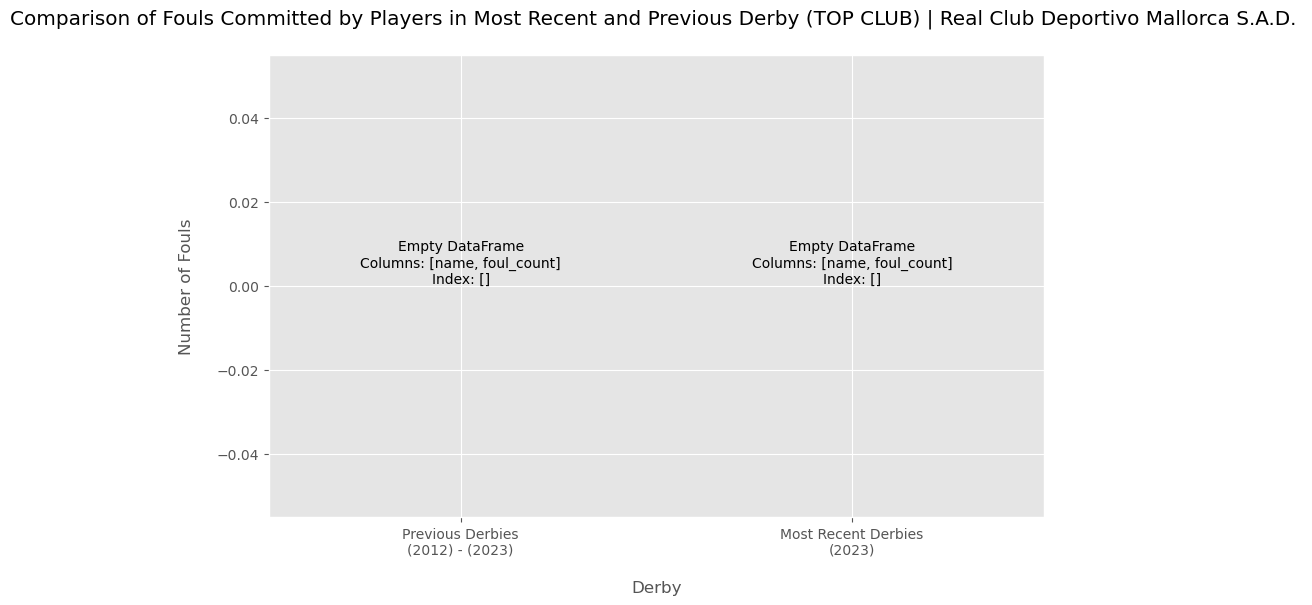

#### Fouls Committed in Previous Derbies:<br>

,name,foul_count


#### Fouls Committed in Most Recent Derbies:<br>

,name,foul_count


In [23]:
# Get a date range of previous derbies
minimum_date_value = detailed_club_info_df_past['date'].dt.year.min()
maximum_date_value = detailed_club_info_df_past['date'].dt.year.max()
previous_date_range = f'({minimum_date_value}) - ({maximum_date_value})' if minimum_date_value != maximum_date_value else f'({minimum_date_value})'

# Labels for the bar chart
labels = [f'Previous Derbies\n{previous_date_range}', 'Most Recent Derbies\n(2023)']

# Count fouls in previous and most recent derbies
fouls_past = detailed_club_info_df_past[detailed_club_info_df_past['isFoul'] == True]
fouls_present = detailed_club_info_df_present[detailed_club_info_df_present['isFoul'] == True]
foul_counts = [fouls_past.shape[0], fouls_present.shape[0]]

# Get player names who committed fouls
players_past = fouls_past.groupby('name').size().reset_index(name='foul_count')
players_present = fouls_present.groupby('name').size().reset_index(name='foul_count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, foul_counts, color=['blue', 'orange'])
plt.xlabel('\nDerby')
plt.ylabel('Number of Fouls\n')
plt.title('Comparison of Fouls Committed by Players in Most Recent and Previous Derby (TOP CLUB) | \n')
plt.title(f'Comparison of Fouls Committed by Players in Most Recent and Previous Derby (TOP CLUB) | {top_club.club_name} \n')

# Annotate bars with player names
for bar, name in zip(bars, [players_past, players_present]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, name, ha='center', va='bottom')

plt.show()

# Display tables for fouls_past and fouls_present
display(Markdown('#### Fouls Committed in Previous Derbies:<br>'))
display(players_past)

display(Markdown('#### Fouls Committed in Most Recent Derbies:<br>'))
display(players_present)

## Select club with last league position

In [24]:
last_club = league_standings_df.sort_values(by=['date', 'league_position'], ascending=True).iloc[0]
last_club

game_id                         2224947
competition_id                      BE1
season                             2012
round                      30. Matchday
date                2013-03-16 00:00:00
club_id                             566
home_club_goals                       3
away_club_goals                       1
league_position                    15.0
club_name                  Beerschot AC
aggregate                           3:1
competition_type        domestic_league
Name: 53, dtype: object

# Detailed Club Analysis (Past and Present)

## Past Season Analysis

### Filter players of the selected club and perform subsequent analysis (For seasons before the last season) - (past)

In [25]:
# Filter df_players to get players of the specific last_club and last_club season
df_club_players_past = df_players[(df_players['current_club_id'] == last_club.club_id)  & (df_players['last_season'] < last_club.season)].copy()
df_club_players_past.rename(columns={'current_club_id':'club_id'}, inplace=True)
df_club_players_past.head(5)

,player_id,first_name,last_name,name,last_season,club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name


### Merge df_games_events with df_club_players based on player_id to analyze fouls committed by club players - (past)

In [26]:
detailed_club_info_df_past = pd.merge(df_game_events, df_club_players_past, on=['player_id','club_id'] , how='inner')
detailed_club_info_df_past.head(5)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name


### Data Cleaning for detailed_club_info_df - (past)

In [27]:
detailed_club_info_df_past.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [28]:
detailed_club_info_df_past = detailed_club_info_df_past[
['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship',
       'sub_position', 'position',
       'current_club_domestic_competition_id',
       'current_club_name']
]

## Present Season Analysis

### Filter players of the selected club and perform subsequent analysis (For the last season) - (present)

In [29]:
# Filter df_players to get players of the specific last_club and last_club season
df_club_players_present = df_players[(df_players['current_club_id'] == last_club.club_id)  & (df_players['last_season'] == last_club.season)].copy()
df_club_players_present.rename(columns={'current_club_id':'club_id'}, inplace=True)
df_club_players_present.head(5)

,player_id,first_name,last_name,name,last_season,club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name
2265,129595,Jaric,Schaessens,Jaric Schaessens,2012,566,jaric-schaessens,NaN,NaN,Belgium,1994-04-08,Central Midfield,Midfield,NaN,NaN,BE1,Beerschot AC
6186,216945,Sam,Van Den Abeel,Sam Van Den Abeel,2012,566,sam-van-den-abeel,NaN,NaN,Belgium,1994-05-09,NaN,Missing,NaN,NaN,BE1,Beerschot AC
7133,9667,Stijn,Stijnen,Stijn Stijnen,2012,566,stijn-stijnen,Belgium,Hasselt,Belgium,1981-04-07,Goalkeeper,Goalkeeper,right,188.0,BE1,Beerschot AC
8954,13049,Wim,De Decker,Wim De Decker,2012,566,wim-de-decker,Belgium,Temse,Belgium,1982-04-06,Defensive Midfield,Midfield,right,184.0,BE1,Beerschot AC
11384,157206,Conor,Laerenbergh,Conor Laerenbergh,2012,566,conor-laerenbergh,Belgium,Wilrijk,Belgium,1993-03-18,Left Winger,Attack,left,179.0,BE1,Beerschot AC


### Merge df_games_events with df_club_players based on player_id to analyze fouls committed by club players - (present)

In [30]:
detailed_club_info_df_present = pd.merge(df_game_events, df_club_players_present, on=['player_id', 'club_id'], how='inner')
detailed_club_info_df_present[detailed_club_info_df_present['isFoul'] == True].head(5)
# df_game_events

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id,cleaned_description,isFoul,first_name,last_name,name,last_season,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,current_club_domestic_competition_id,current_club_name
24,a58c1ad7abf4ee77bd55b78727ca98a3,2012-10-31,2224776,29,Cards,566,9667,"Red card , Professional foul",NaN,NaN,"Redcard,Professionalfoul",True,Stijn,Stijnen,Stijn Stijnen,2012,stijn-stijnen,Belgium,Hasselt,Belgium,1981-04-07,Goalkeeper,Goalkeeper,right,188.0,BE1,Beerschot AC


### Data Cleaning for detailed_club_info_df - (present)

In [31]:
detailed_club_info_df_present.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'current_club_domestic_competition_id',
       'current_club_name'],
      dtype='object')

In [32]:
detailed_club_info_df_present = detailed_club_info_df_present[
['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'player_in_id', 'player_assist_id',
       'cleaned_description', 'isFoul', 'first_name', 'last_name', 'name',
       'last_season', 'club_id', 'player_code', 'country_of_birth',
       'city_of_birth', 'country_of_citizenship',
       'sub_position', 'position',
       'current_club_domestic_competition_id',
       'current_club_name']
]

### Format and Visualize fouls committed in previous and most recent derbies (Last Club)

#### Date Conversion
The date columns in detailed_club_info_df_past and detailed_club_info_df_present are converted to datetime format.

In [33]:
# Convert date columns to datetime format
detailed_club_info_df_past['date'] = pd.to_datetime(detailed_club_info_df_past['date'])
detailed_club_info_df_present['date'] = pd.to_datetime(detailed_club_info_df_present['date'])

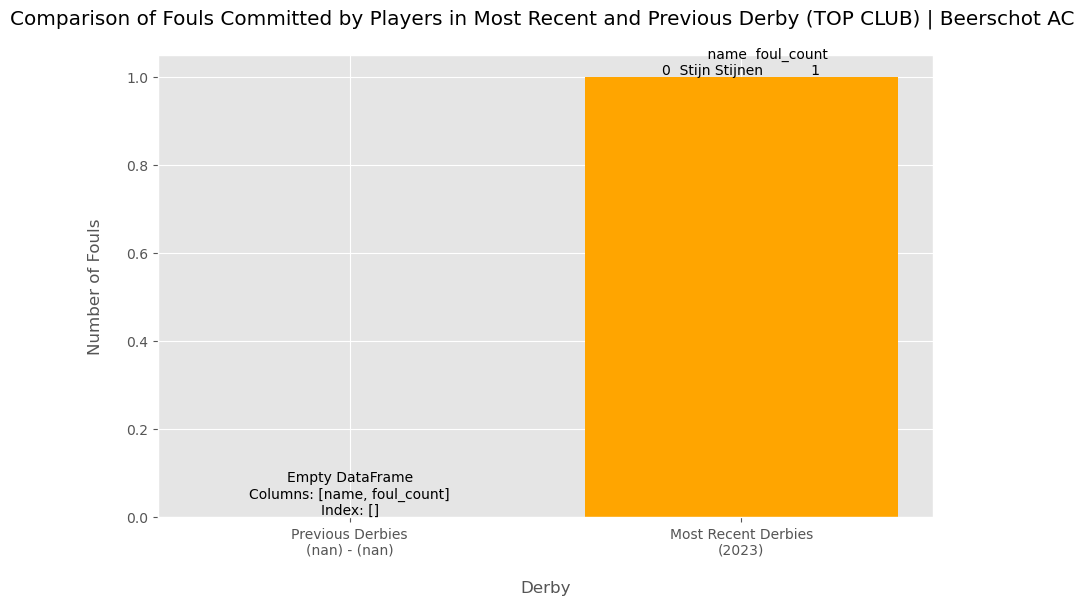

#### Fouls Committed in Previous Derbies:<br>

,name,foul_count


#### Fouls Committed in Most Recent Derbies:<br>

,name,foul_count
0,Stijn Stijnen,1


In [34]:
# Get a date range of previous derbies
minimum_date_value = detailed_club_info_df_past['date'].dt.year.min()
maximum_date_value = detailed_club_info_df_past['date'].dt.year.max()
previous_date_range = f'({minimum_date_value}) - ({maximum_date_value})' if minimum_date_value != maximum_date_value else f'({minimum_date_value})'

# Labels for the bar chart
labels = [f'Previous Derbies\n{previous_date_range}', 'Most Recent Derbies\n(2023)']

# Count fouls in previous and most recent derbies
fouls_past = detailed_club_info_df_past[detailed_club_info_df_past['isFoul'] == True]
fouls_present = detailed_club_info_df_present[detailed_club_info_df_present['isFoul'] == True]
foul_counts = [fouls_past.shape[0], fouls_present.shape[0]]

# Get player names who committed fouls
players_past = fouls_past.groupby('name').size().reset_index(name='foul_count')
players_present = fouls_present.groupby('name').size().reset_index(name='foul_count')

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, foul_counts, color=['blue', 'orange'])
plt.xlabel('\nDerby')
plt.ylabel('Number of Fouls\n')
plt.title('Comparison of Fouls Committed by Players in Most Recent and Previous Derby (TOP CLUB) | \n')
plt.title(f'Comparison of Fouls Committed by Players in Most Recent and Previous Derby (TOP CLUB) | {last_club.club_name} \n')

# Annotate bars with player names
for bar, name in zip(bars, [players_past, players_present]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, name, ha='center', va='bottom')

plt.show()

# Display tables for fouls_past and fouls_present
display(Markdown('#### Fouls Committed in Previous Derbies:<br>'))
display(players_past)

display(Markdown('#### Fouls Committed in Most Recent Derbies:<br>'))
display(players_present)